In [52]:
#imort packages
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import classification_report
import imblearn
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,fbeta_score, precision_recall_curve,auc
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import pandas as pd
import researchpy as rp
import scipy.stats as stats
from category_encoders.ordinal import OrdinalEncoder
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB , ComplementNB, CategoricalNB
from imblearn.metrics import geometric_mean_score
from sklearn.inspection import permutation_importance


# (0) desprective statistics

In [3]:
url = "https://raw.githubusercontent.com/Eladgo10/DS-Seminar-project-/main/fraud_oracle.csv"
dataset = pd.read_csv(url)
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### ****desprective statisitc - numeric features****

In [4]:
dataset.describe()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


#### ****desprective statisitc - qualtive features****

In [5]:
dataset.describe(include=['object'])

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


#### intresting variablas

In [6]:
print(dataset['FraudFound_P'].value_counts(),'\n') # 923 frauds and 14497 not fraud - outcome
print(dataset['AgeOfPolicyHolder'].value_counts(),'\n')
print(dataset['WitnessPresent'].value_counts(), '\n')
print(dataset['PoliceReportFiled'].value_counts())


0    14497
1      923
Name: FraudFound_P, dtype: int64 

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64 

No     15333
Yes       87
Name: WitnessPresent, dtype: int64 

No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64


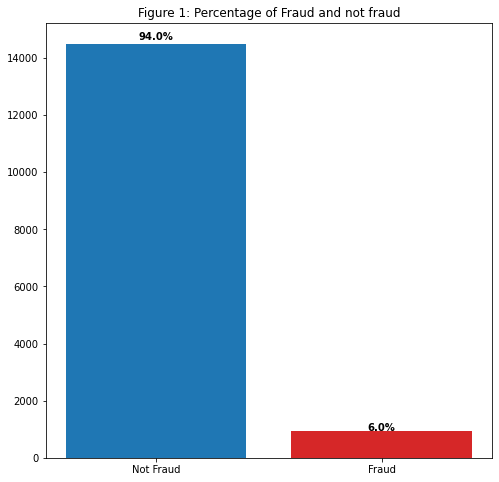

In [7]:
# creating data for the plot
data_FraudFound_P = pd.DataFrame({'category':['Not Fraud', 'Fraud'],
                     'counts': dataset['FraudFound_P'].value_counts().values,
                     'percentage': [round(sum(dataset.FraudFound_P == 0)/len(dataset), 3)*100 ,
                                    round(sum(dataset.FraudFound_P == 1)/len(dataset), 3)*100]
                    })
 

plt.figure(figsize=(8,8))
colors_list = ['tab:blue', 'tab:red']
graph = plt.bar(data_FraudFound_P.category,data_FraudFound_P.counts, color = colors_list)
plt.title("Figure 1: Percentage of Fraud and not fraud")

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_FraudFound_P.percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

#### bar plots Fraud againg important variabls

In [8]:
dataset.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

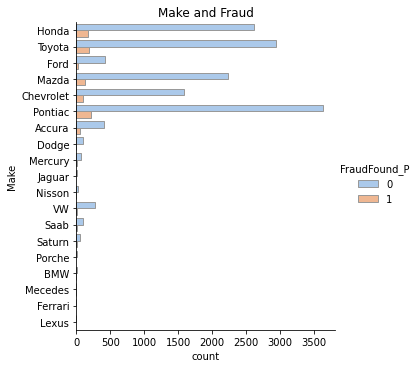

In [9]:
sns.catplot(y="Make", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Make and Fraud")
plt.show()


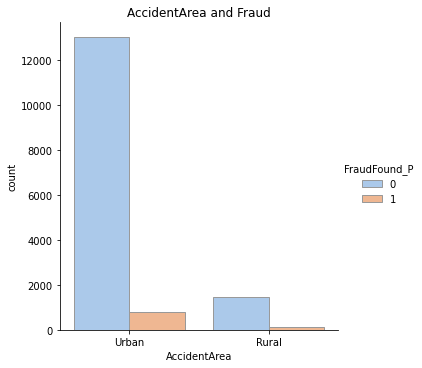

In [10]:
sns.catplot(x="AccidentArea", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AccidentArea and Fraud")
plt.show()


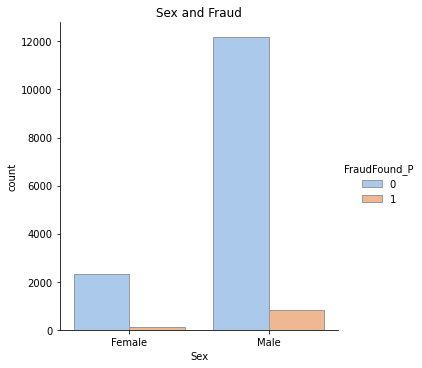

In [11]:
sns.catplot(x="Sex", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


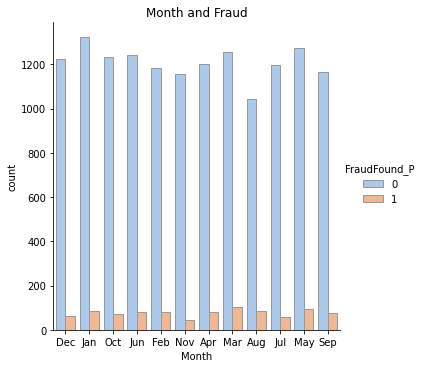

In [12]:
sns.catplot(x="Month", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Month and Fraud")
plt.show()


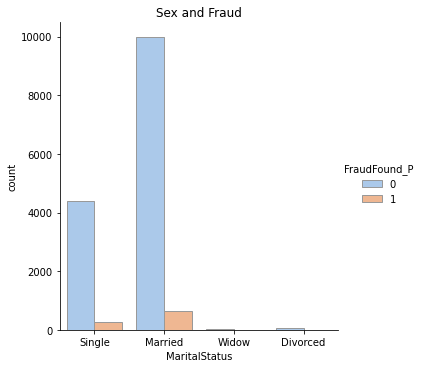

In [13]:
sns.catplot(x="MaritalStatus", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


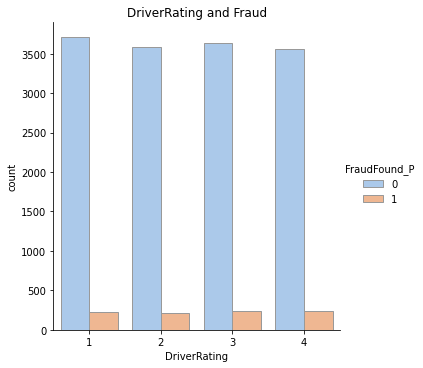

In [14]:
sns.catplot(x="DriverRating", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "DriverRating and Fraud")
plt.show()


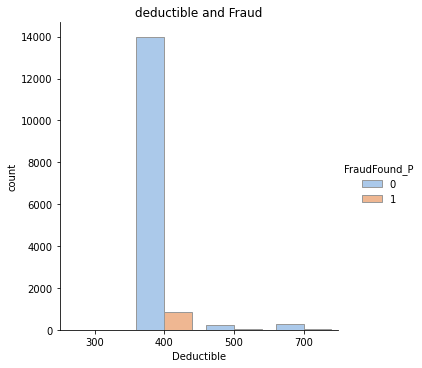

In [15]:
sns.catplot(x="Deductible", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "deductible and Fraud")
plt.show()

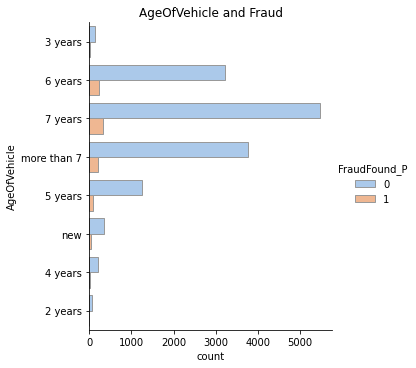

In [16]:
sns.catplot(y="AgeOfVehicle", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgeOfVehicle and Fraud")
plt.show()

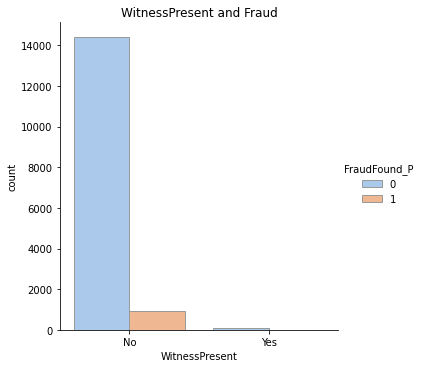

In [17]:
sns.catplot(x="WitnessPresent", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "WitnessPresent and Fraud")
plt.show()

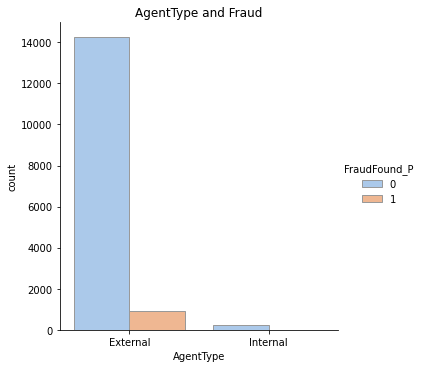

In [18]:
sns.catplot(x="AgentType", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgentType and Fraud")
plt.show()

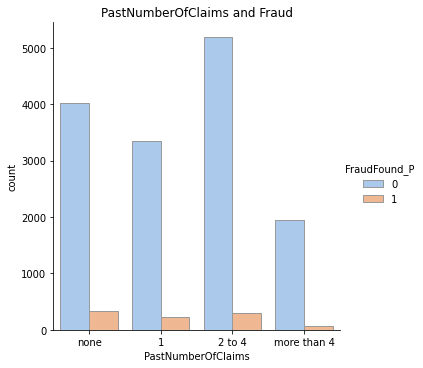

In [19]:
sns.catplot(x="PastNumberOfClaims", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PastNumberOfClaims and Fraud")
plt.show()

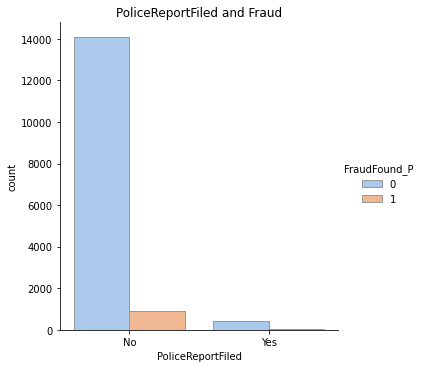

In [20]:
sns.catplot(x="PoliceReportFiled", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PoliceReportFiled and Fraud")
plt.show()

In [21]:
dataset.columns[~dataset.columns.isin(["Age", 'Month'])]

Index(['WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

### χ^2 test

In [ ]:
col_names = dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    col_names = col_names[col_names != i]
    for j in col_names:
        crosstab, test_results, expected = rp.crosstab(dataset[i], dataset[j],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
        if test_results['results'][1] < 0.05:
            print(i + ' ' + j + ':')
            print(test_results)
            print('\n')
    print('****** new ******')
    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] < 0.05:
        print(i + ':')
        print(test_results)
        print('\n')

    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] > 0.05:
        print(i + ':')
        print(test_results)
        print('\n')


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P)


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    print(pd.crosstab(dataset[i], dataset.FraudFound_P))
    print(pd.crosstab(dataset[i], dataset.FraudFound_P, normalize = 'columns'))
   

# (1) Data preproccesing 

#### changing the zero values to nan values in columns: Age, DayOfWeekClaimed, weekclaimed

In [22]:
#Age
print(sum(dataset['Age']  == 0))
dataset.loc[dataset['Age'] == 0, 'Age'] = np.nan

#DayOfWeekClaimed
print(dataset['DayOfWeekClaimed'].unique())
dataset[dataset['DayOfWeekClaimed'] == '0'] # obs 1516 has a 
dataset.loc[dataset['DayOfWeekClaimed'] == 0, 'DayOfWeekClaimed'] = np.nan

#MonthClaimed
print(sum(dataset['MonthClaimed']  == '0'))
dataset.loc[dataset['MonthClaimed'] == '0', 'DayOfWeekClaimed'] = np.nan

320
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
1


### function for dropping Irrelevant_colmuns - PolicyType, PolicyNumber


In [23]:
def Irrelevant_col(df , drop):
    df.drop(drop, axis=1, inplace=True)


#drop in my data set    
drop = ["PolicyType","PolicyNumber"] 
dataset_new = dataset
Irrelevant_col(dataset_new, drop)

dataset_new

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


### 1.(a) null values of age, day of week - replacing with mean

In [24]:
# removing rows
dataset_new_rem = dataset_new.dropna(subset = ['Age'])
dataset_new_rem = dataset_new_rem.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_rem.isnull().sum())

# avereging
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
# We instantiated a SimpleImputer object looking for missing values that are represented
#by np.NaN and asking Scikit-Learn to use the 'mean' as its strategy. 
#This means that any np.NaN values will be imputed by the columns mean.

dataset_new_avg = dataset_new
imputer=imputer.fit(dataset_new_avg[['Age']])
dataset_new_avg[['Age']]=imputer.transform(dataset_new_avg[['Age']])
dataset_new_avg = dataset_new_avg.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_avg.isnull().sum())

### 1.(b) dealing with categorials features

In [25]:
dataset_new.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                     float64
Fault                    object
VehicleCategory          object
VehiclePrice             object
FraudFound_P              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: o

In [26]:
y =  dataset_new.FraudFound_P.copy()
X = dataset_new.drop('FraudFound_P', axis = 1, inplace=False ).copy()

#### Binary variables zero one coding:

In [27]:
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
y_val = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
x_val = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

for i in range(len(cols)):
    X_idx1 = X[cols[i]]==y_val[i]
    X_idx2 = X[cols[i]]==x_val[i]

    X.loc[list(X_idx1),cols[i]]=1
    X.loc[list(X_idx2),cols[i]]=0

for i in range(len(cols)):
    X[cols[i]] = X[cols[i]].astype('int')
    
X.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea              int64
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus            object
Age                     float64
Fault                     int64
VehicleCategory          object
VehiclePrice             object
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled         int64
WitnessPresent            int64
AgentType                 int64
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: object

#### Ordianal categorial featurs:

In [28]:
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
X2 = ord_encoder.fit_transform(X)
X2.loc[X2["DayOfWeekClaimed"] == -1.0,"DayOfWeekClaimed"] = 0
X2.loc[X2["MonthClaimed"] == -1.0,"MonthClaimed"] = 0

#### ordianal categorial featurs - taking the avg for each category 


In [29]:
col_map = [{'Days_Policy_Accident':{'more than 30': 31,'15 to 30': 22.5,'none': 0,'1 to 7': 4,'8 to 15': 11.5}},
    {'Days_Policy_Claim':{'more than 30': 31,'15 to 30': 22.5,'8 to 15': 11.5,'none': 0}},
    {'AgeOfPolicyHolder':{'26 to 30':28,'31 to 35':33,'41 to 50':45.5,'51 to 65':58,'21 to 25':23,'36 to 40':38,'16 to 17':16.5,
                                          'over 65':66,'18 to 20':19}},
    {'AddressChange_Claim':{'1 year':1,'no change':0,'4 to 8 years':6,'2 to 3 years':2.5,'under 6 months':0.5}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
]

X3 = X2.copy()
for i in range(len(col_map)):
    X3.replace(col_map[i], inplace=True)

X3.dtypes

Month                     int64
WeekOfMonth               int64
DayOfWeek                 int64
Make                     object
AccidentArea              int64
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus            object
Age                     float64
Fault                     int64
VehicleCategory          object
VehiclePrice              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims        int64
AgeOfVehicle              int64
AgeOfPolicyHolder       float64
PoliceReportFiled         int64
WitnessPresent            int64
AgentType                 int64
NumberOfSuppliments       int64
AddressChange_Claim     float64
NumberOfCars            float64
Year                      int64
BasePolicy               object
dtype: object

#### One hot endoder for the categorial features

In [30]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.one_hot import OneHotEncoder

#implementing one-hot encoding
one_hot_encoder = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 

#implementing label encoding, with random assignment of integers to each label
# assumes no natrual underlying order to the feature labels
ord_encoder1 = OrdinalEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],return_df=True)

#implementing binary encoding
#represents the data 
bi_encoder = BinaryEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'], return_df=True)

#implimented a simple switch to change how I wanted to encode the variables
#Allowed for a updating the independet variables quickly and not missing a code box

switch_val = 0
if switch_val ==0:
    X4 = one_hot_encoder.fit_transform(X3)
elif switch_val==1:
    X4 = ord_encoder1.fit_transform(X3)
else:
    X4 = bi_encoder.fit_transform(X3)
    
X4.dtypes


Month                        int64
WeekOfMonth                  int64
DayOfWeek                    int64
Make_Honda                   int64
Make_Toyota                  int64
Make_Ford                    int64
Make_Mazda                   int64
Make_Chevrolet               int64
Make_Pontiac                 int64
Make_Accura                  int64
Make_Dodge                   int64
Make_Mercury                 int64
Make_Jaguar                  int64
Make_Nisson                  int64
Make_VW                      int64
Make_Saab                    int64
Make_Saturn                  int64
Make_Porche                  int64
Make_BMW                     int64
Make_Mecedes                 int64
Make_Ferrari                 int64
Make_Lexus                   int64
AccidentArea                 int64
DayOfWeekClaimed           float64
MonthClaimed               float64
WeekOfMonthClaimed           int64
Sex                          int64
MaritalStatus_Single         int64
MaritalStatus_Marrie

In [31]:
from scipy.stats import pearsonr
print(pearsonr(X4.Age, X4.AgeOfPolicyHolder))
print(pearsonr(X4.MonthClaimed, X4.Month))
print(pearsonr(X4.BasePolicy_Liability,X4.VehicleCategory_Sport))

(0.8995052651641743, 0.0)
(0.8335242937029943, 0.0)
(0.944432189599651, 0.0)


In [32]:
X4.corr()

,Month,WeekOfMonth,DayOfWeek,Make_Honda,Make_Toyota,Make_Ford,Make_Mazda,Make_Chevrolet,Make_Pontiac,Make_Accura,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy_Liability,BasePolicy_Collision,BasePolicy_All Perils
Month,1.000000,0.031442,0.000968,-0.021027,-0.003369,0.002855,0.005397,-0.002603,0.018575,0.004674,...,0.047896,-0.001515,-0.023576,0.024617,0.001477,-0.015607,0.048852,-0.011205,0.032236,-0.023067
WeekOfMonth,0.031442,1.000000,-0.013370,0.012041,0.004741,-0.004448,-0.009569,-0.004139,-0.001375,-0.001817,...,0.013026,0.013713,-0.006477,0.000177,0.000147,0.002901,-0.003906,-0.004198,-0.004401,0.009069
DayOfWeek,0.000968,-0.013370,1.000000,-0.000321,0.002423,0.000286,-0.000881,-0.006622,0.014497,-0.013943,...,0.015406,0.004251,-0.003516,-0.001544,0.006422,-0.010573,0.007275,-0.055095,0.039266,0.014744
Make_Honda,-0.021027,0.012041,-0.000321,1.000000,-0.237332,-0.081684,-0.199975,-0.164797,-0.271162,-0.083719,...,-0.017145,-0.008541,0.014614,-0.066027,-0.006243,-0.001082,-0.008792,0.023751,0.035583,-0.062796
Make_Toyota,-0.003369,0.004741,0.002423,-0.237332,1.000000,-0.087339,-0.213818,-0.176205,-0.289933,-0.089514,...,-0.004546,-0.007777,0.008820,-0.004340,0.003370,0.004898,0.000350,-0.015102,-0.019789,0.036880
Make_Ford,0.002855,-0.004448,0.000286,-0.081684,-0.087339,1.000000,-0.073591,-0.060646,-0.099789,-0.030809,...,0.017613,0.002372,-0.021641,0.024850,-0.008070,-0.010908,0.000522,-0.012486,-0.027682,0.042660
Make_Mazda,0.005397,-0.009569,-0.000881,-0.199975,-0.213818,-0.073591,1.000000,-0.148470,-0.244297,-0.075424,...,0.010605,-0.007899,0.006964,0.008689,0.007222,0.002509,-0.001274,0.023229,0.065110,-0.093993
Make_Chevrolet,-0.002603,-0.004139,-0.006622,-0.164797,-0.176205,-0.060646,-0.148470,1.000000,-0.201322,-0.062156,...,0.010567,-0.001345,-0.023030,0.018211,0.012737,-0.003452,-0.003507,0.019971,-0.023050,0.004131
Make_Pontiac,0.018575,-0.001375,0.014497,-0.271162,-0.289933,-0.099789,-0.244297,-0.201322,1.000000,-0.102274,...,0.000456,0.022733,0.006009,0.028510,-0.009144,-0.008096,0.014070,-0.019347,-0.014644,0.035737
Make_Accura,0.004674,-0.001817,-0.013943,-0.083719,-0.089514,-0.030809,-0.075424,-0.062156,-0.102274,1.000000,...,0.002061,0.011746,-0.004926,-0.004655,-0.000589,0.004527,-0.011705,-0.043670,-0.044448,0.092914


### drop

In [33]:
drop = ['Make_Honda', 'Make_Toyota','Make_Toyota', 'Make_Ford','Make_Mazda','Make_Chevrolet','Make_Pontiac',
        'Make_Accura', 'Make_Accura','Make_Dodge', 'Make_Mercury', 'Make_Jaguar','Make_Nisson','Make_VW','Make_Saab',
        'Make_Saturn','Make_Porche','Make_BMW','Make_BMW','Make_Mecedes','Make_Ferrari','Make_Lexus',
        'AgeOfPolicyHolder']
X5 = X4.copy()                 
Irrelevant_col(X5, drop)

# (3)splitting our data to train, validation and test sets


In [34]:
random.seed(2022)
def train_val_test_split(X, y, train_ratio, validation_ratio, test_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state = 3)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                          test_size= validation_ratio/(train_ratio+validation_ratio), random_state =3)
    return X_train, y_train, X_valid, y_valid,  X_test, y_test

In [35]:
random.seed(10)
X_train, y_train, X_valid, y_valid,  X_test, y_test = train_val_test_split(X= X4, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)
print(len(y_valid)/len(y))

(10793, 55)
(1542, 55)
(3085, 55)
(10793,)
(1542,)
(3085,)
0.20006485084306097


In [36]:
X_train1, y_train1, X_valid1, y_valid1,  X_test1, y_test1 = train_val_test_split(X= X5, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train1.shape)
print(X_test1.shape)
print(X_valid1.shape)
print(y_train1.shape)
print(y_test1.shape)
print(y_valid1.shape)
print(len(y_valid1)/len(y))

(10793, 35)
(1542, 35)
(3085, 35)
(10793,)
(1542,)
(3085,)
0.20006485084306097


# (5) **Oversamling** , **undersampling**, **cost-sensativity**

#### (5.1) oversampling

In [37]:

print('Original traim shape %s' % Counter(y_train))
sm = SMOTE(random_state=2022)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled train shape %s' % Counter(y_res))


Original traim shape Counter({0: 10143, 1: 650})
Resampled train shape Counter({0: 10143, 1: 10143})


In [38]:
print('Original traim shape %s' % Counter(y_train1))
sm = SMOTE(random_state=2022)
X_res1, y_res1 = sm.fit_resample(X_train1, y_train1)
print('Resampled train shape %s' % Counter(y_res1))

Original traim shape Counter({0: 10143, 1: 650})
Resampled train shape Counter({0: 10143, 1: 10143})


#### (5.1) undersampling

In [39]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under))

Resampled train shape Counter({0: 650, 1: 650})


In [40]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under1, y_under1 = undersample.fit_resample(X_train1, y_train1)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under1))

Resampled train shape Counter({0: 650, 1: 650})


# imbalanced feature selection

In [41]:
# input: train sample, m - number of fetures to select, K vec of clusters for each class, La - label for train
# K = (num_clusters_maority, num_clusters minority)
#  first phase: local clustering
    # for each class
        # kmeans_cluster(tr(class), K[class])
        # relab;e(label(class), label(new_subclass))
# 2nd_phase: feature sellect
    # select M best of mutual information method
#    return train_M_best
X_majority = X_train[y_train == 0]
X_minority = X_train[y_train == 1]
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=12, random_state=2022)
k_cluster = k_cluster.fit(X_majority)
labels= k_cluster.labels_ + 2
labels = np.append(labels, np.repeat(1, sum(y_train == 1)))
X_new = X_majority.copy()
X_new = X_new.append(X_minority)
X_comp_filter = SelectKBest(mutual_info_classif, k=11).fit(X_new, labels)
# names chosen by compision based Feature Selection 
comp_names = X_comp_filter.feature_names_in_[X_comp_filter.get_support(indices=True)] 

/tmp/ipykernel_3156/3581531040.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_new = X_new.append(X_minority)


In [42]:
# input: train sample, m - number of fetures to select, K vec of clusters for each class, La - label for train
# K = (num_clusters_maority, num_clusters minority)
#  first phase: local clustering
    # for each class
        # kmeans_cluster(tr(class), K[class])
        # relab;e(label(class), label(new_subclass))
# 2nd_phase: feature sellect
    # select M best of mutual information method
#    return train_M_best
X_majority1 = X_train1[y_train1 == 0]
X_minority1 = X_train1[y_train1 == 1]
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=12, random_state=2022)
k_cluster = k_cluster.fit(X_majority1)
labels= k_cluster.labels_ + 2
labels = np.append(labels, np.repeat(1, sum(y_train1 == 1)))
X_new1= X_majority1.copy()
X_new1= X_new1.append(X_minority1)
X_comp_filter1 = SelectKBest(mutual_info_classif, k=11).fit(X_new1, labels)
# names chosen by compision based Feature Selection 
comp_names1 = X_comp_filter1.feature_names_in_[X_comp_filter1.get_support(indices=True)] 

/tmp/ipykernel_3156/2506662752.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_new1= X_new1.append(X_minority1)


#### (5.2) classifiers

###### RF

In [43]:
# Random forest
rf = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 3, max_depth =5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)


###### RF - SMOTH

In [44]:
rf_smoth = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_smoth.fit(X_res, y_res)
rf_smoth_pred = rf_smoth.predict(X_valid)

In [45]:
rf_smoth1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_smoth1.fit(X_res1, y_res1)
rf_smoth1_pred = rf_smoth1.predict(X_valid1)

###### RF-NearMiss

In [46]:
rf_nearmiss = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_nearmiss.fit(X_under, y_under)
rf_nearmiss_pred = rf_nearmiss.predict(X_valid)

In [47]:
rf_nearmiss1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_nearmiss1.fit(X_under1, y_under1)
rf_nearmiss1_pred = rf_nearmiss1.predict(X_valid1)

###### RF- CS

In [48]:
rf_cs = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:16})
rf_cs.fit(X_train, y_train)
rf_cs_pred = rf_cs.predict(X_valid)

In [49]:
rf_cs1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:16})
rf_cs1.fit(X_train1, y_train1)
rf_cs1_pred = rf_cs1.predict(X_valid1)

### feature importance

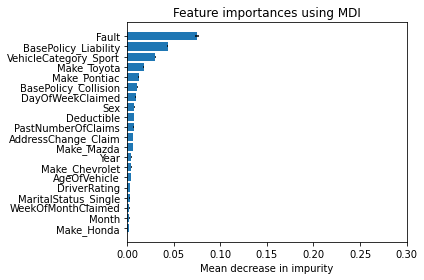

In [53]:
# RF-SMOTH-X4
feature_names = [f"feature {i}" for i in range(X_res.shape[1])]
results = permutation_importance(rf_smoth, X_res, y_res, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_res.columns)
forest_importances = pd.Series(importance, index=X_res.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

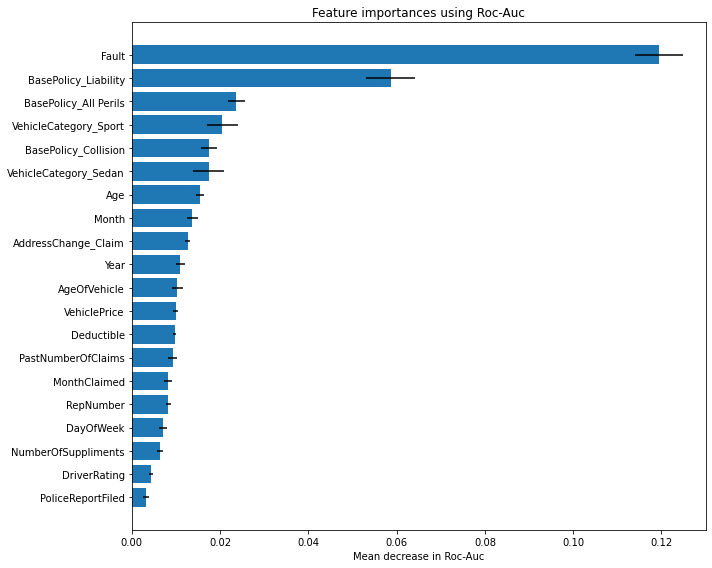

In [54]:
# RF-SMOTH-X5 
feature_names = [f"feature {i}" for i in range(X_res1.shape[1])]
results = permutation_importance(rf_smoth1, X_res1, y_res1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_res1.columns)
forest_importances = pd.Series(importance, index=X_res1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

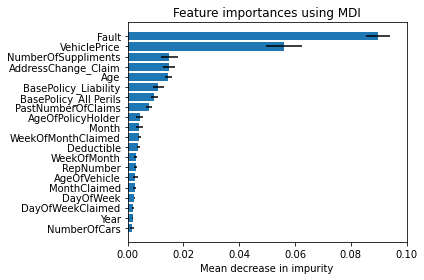

In [55]:
# RF-NearMiss-X4 
feature_names = [f"feature {i}" for i in range(X_under.shape[1])]
results = permutation_importance(rf_nearmiss, X_under, y_under, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_under.columns)
forest_importances = pd.Series(importance, index=X_under.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

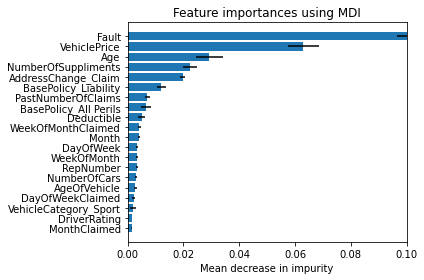

In [56]:
# RF-NearMiss-X5 
feature_names = [f"feature {i}" for i in range(X_under1.shape[1])]
results = permutation_importance(rf_nearmiss1, X_under1, y_under1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_under1.columns)
forest_importances = pd.Series(importance, index=X_under1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

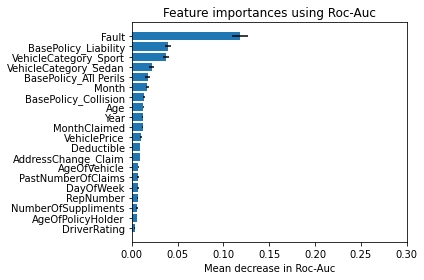

In [57]:
# RF-CS-X4
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
results = permutation_importance(rf_cs, X_train, y_train, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_train.columns)
forest_importances = pd.Series(importance, index=X_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using Roc-Auc")
ax.set_xlabel("Mean decrease in Roc-Auc")
plt.xlim(0,0.3)
fig.tight_layout()

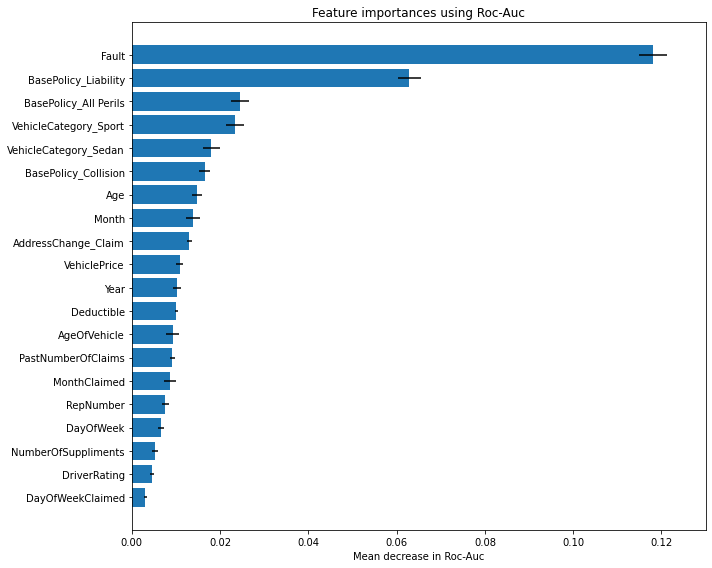

In [58]:
# RF-CS-X5 
feature_names = [f"feature {i}" for i in range(X_train1.shape[1])]
results = permutation_importance(rf_cs1, X_train1, y_train1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_train1.columns)
forest_importances = pd.Series(importance, index=X_train1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using Roc-Auc")
ax.set_xlabel("Mean decrease in Roc-Auc")
plt.xlim(0,0.13)
fig.tight_layout()

##### NB- SMOTH

In [59]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_smoth = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_smoth.fit(X_res, y_res)
nb_smoth_pred = nb_smoth.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

In [60]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_smoth1 = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_smoth1.fit(X_res1, y_res1)
nb_smoth1_pred = nb_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

NB Smoth Compositon FS

In [61]:
# X_comp_filter 

naiv_b = BernoulliNB(alpha=1)
nb_comp_smoth = make_pipeline( StandardScaler(), naiv_b)
nb_comp_smoth.fit(X_res[comp_names], y_res)
nb_comp_smoth_pred = nb_comp_smoth.predict(X_valid[comp_names])


In [62]:

naiv_b = BernoulliNB(alpha=1)
nb_comp_smoth1 = make_pipeline( StandardScaler(), naiv_b)
nb_comp_smoth1.fit(X_res1[comp_names1], y_res1)
nb_comp_smoth1_pred = nb_comp_smoth1.predict(X_valid1[comp_names1])


##### NB- NearMiss

In [63]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_nearmiss = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_nearmiss.fit(X_under, y_under)
nb_nearmiss_pred = nb_nearmiss.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'Make_Porche', 'AccidentArea', 'Age', 'Fault',
       'VehiclePrice', 'Deductible', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'NumberOfSuppliments'], dtype=object)

In [64]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_nearmiss1 = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_nearmiss1.fit(X_under1, y_under1)
nb_nearmiss1_pred = nb_nearmiss1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['Month', 'WeekOfMonthClaimed', 'Age', 'Fault', 'VehiclePrice',
       'Deductible', 'DriverRating', 'AgeOfVehicle',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability'], dtype=object)

NB NearMiss Compositon FS

In [65]:

naiv_b = BernoulliNB(alpha=1)
nb_comp_nearmiss = make_pipeline( StandardScaler(), naiv_b)
nb_comp_nearmiss.fit(X_under[comp_names], y_under)
nb_comp_nearmiss_pred = nb_comp_nearmiss.predict(X_valid[comp_names])


In [66]:

naiv_b = BernoulliNB(alpha=1 , )
nb_comp_nearmiss1 = make_pipeline( StandardScaler(), naiv_b)
nb_comp_nearmiss1.fit(X_under1[comp_names1], y_under1)
nb_comp_nearmiss1_pred = nb_comp_nearmiss1.predict(X_valid1[comp_names1])


##### NB- CS

In [67]:
train_weights = sklearn.utils.compute_sample_weight({0: 1, 1: 20}, y_train)
train_weights1 = sklearn.utils.compute_sample_weight({0: 1, 1: 20}, y_train1)

In [68]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1 )
nb_cs = make_pipeline(mutual_filter, StandardScaler(),naiv_b)
kwargs = {nb_cs.steps[-1][0] + '__sample_weight': train_weights}
nb_cs.fit(X_train, y_train, **kwargs)
nb_cs_pred = nb_cs.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['WeekOfMonth', 'Make_Toyota', 'AccidentArea', 'MonthClaimed',
       'Fault', 'VehicleCategory_Sport', 'VehicleCategory_Sedan',
       'DriverRating', 'NumberOfSuppliments', 'BasePolicy_Liability',
       'BasePolicy_Collision'], dtype=object)

In [69]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1 )
nb_cs1 = make_pipeline(mutual_filter, StandardScaler(),naiv_b)
kwargs1 = {nb_cs1.steps[-1][0] + '__sample_weight': train_weights1}
nb_cs1.fit(X_train1, y_train1, **kwargs1)
nb_cs_pred1 = nb_cs1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


NB CS with compostion

In [ ]:

naiv_b = BernoulliNB(alpha=1 )
nb_comp_cs = make_pipeline(StandardScaler(),naiv_b)
kwargs = {nb_comp_cs.steps[-1][0] + '__sample_weight': train_weights}
nb_comp_cs.fit(X_train[comp_names], y_train, **kwargs)
nb_cs_comp_pred = nb_comp_cs.predict(X_valid[comp_names])




In [ ]:

naiv_b = BernoulliNB(alpha=1 )
nb_comp_cs1 = make_pipeline(StandardScaler(),naiv_b)
kwargs1 = {nb_comp_cs1.steps[-1][0] + '__sample_weight': train_weights1}
nb_comp_cs1.fit(X_train[comp_names1], y_train1, **kwargs)
nb_cs_comp_pred1 = nb_comp_cs1.predict(X_valid1[comp_names1])




#### SVM - SMOTH

In [ ]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
svm = SVC(gamma='auto')
svm_smoth = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_smoth.fit(X_res, y_res)
svm_smoth_pred = svm_smoth.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['Make_Toyota', 'DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

In [ ]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
svm = SVC(gamma='auto')
svm_smoth1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_smoth1.fit(X_res1, y_res1)
svm_smoth1_pred = svm_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehicleCategory_Sedan',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim',
       'NumberOfCars', 'Year', 'BasePolicy_Liability'], dtype=object)

SVM - SMOTH COMPOSITION

In [ ]:
svm = SVC(gamma='auto')
svm_comp_smoth = make_pipeline(StandardScaler(), svm)
svm_comp_smoth.fit(X_res[comp_names], y_res)
svm_comp_smoth_pred = svm_comp_smoth.predict(X_valid[comp_names])

In [ ]:
svm = SVC(gamma='auto')
svm_comp_smoth1 = make_pipeline(StandardScaler(), svm)
svm_comp_smoth1.fit(X_res1[comp_names1], y_res1)
svm_comp_smoth1_pred = svm_comp_smoth1.predict(X_valid1[comp_names1])

#### SVM - NearMiss

In [ ]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto')
svm_nearmiss = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_nearmiss.fit(X_under, y_under)
svm_nearmiss_pred = svm_nearmiss.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'Make_Mazda', 'Make_Chevrolet',
       'WeekOfMonthClaimed', 'Age', 'Fault', 'VehiclePrice', 'Deductible',
       'Days_Policy_Accident', 'AgeOfPolicyHolder', 'NumberOfSuppliments',
       'AddressChange_Claim', 'Year', 'BasePolicy_Liability'],
      dtype=object)

In [ ]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto')
svm_nearmiss1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_nearmiss1.fit(X_under1, y_under1)
svm_nearmiss1_pred = svm_nearmiss1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehiclePrice', 'Deductible',
       'Days_Policy_Accident', 'PastNumberOfClaims', 'AgeOfVehicle',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability', 'BasePolicy_All Perils'], dtype=object)

SVM NEARMISS COMPOSITION

In [ ]:
svm = SVC(gamma='auto')
svm_comp_nearmiss = make_pipeline( StandardScaler(), svm)
svm_comp_nearmiss.fit(X_under[comp_names], y_under)
svm_comp_nearmiss_pred = svm_comp_nearmiss.predict(X_valid[comp_names])

In [ ]:
svm = SVC(gamma='auto')
svm_comp_nearmiss1 = make_pipeline( StandardScaler(), svm)
svm_comp_nearmiss1.fit(X_under1[comp_names1], y_under1)
svm_comp_nearmiss1_pred = svm_comp_nearmiss1.predict(X_valid1[comp_names1])

#### SVM - CS

In [ ]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', class_weight = {0:1 , 1:20})
svm_cs = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_cs.fit(X_train, y_train)
svm_cs_pred = svm_cs.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'Make_Pontiac', 'Make_Dodge', 'Make_Saturn',
       'Fault', 'VehicleCategory_Sport', 'VehicleCategory_Sedan',
       'VehiclePrice', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfCars', 'BasePolicy_Liability', 'BasePolicy_Collision',
       'BasePolicy_All Perils'], dtype=object)

In [ ]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', class_weight = {0:1 , 1:20})
svm_cs1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_cs1.fit(X_train1, y_train1)
svm_cs1_pred = svm_cs1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['Sex', 'MaritalStatus_Single', 'Fault', 'VehicleCategory_Sport',
       'VehicleCategory_Sedan', 'VehiclePrice', 'Days_Policy_Accident',
       'AgentType', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy_Liability', 'BasePolicy_Collision',
       'BasePolicy_All Perils'], dtype=object)

SVM - CS COMPOSITION

In [ ]:
svm = SVC(gamma='auto',  class_weight = {0:1 , 1:20})
svm_comp_cs = make_pipeline(StandardScaler(), svm)
svm_comp_cs.fit(X_res[comp_names], y_res)
svm_comp_cs_pred = svm_comp_cs.predict(X_valid[comp_names])

In [ ]:
svm = SVC(gamma='auto',  class_weight = {0:1 , 1:20})
svm_comp_cs1 = make_pipeline(StandardScaler(), svm)
svm_comp_cs1.fit(X_res1[comp_names1], y_res1)
svm_comp_cs1_pred = svm_comp_cs1.predict(X_valid1[comp_names1])

#### (5.2) measures

In [ ]:
def eval_pref(pred, y, classifier, model):
    precision, recall, thresholds = precision_recall_curve(y, pred)
    auc1 = auc(recall, precision)
    print(model,':')
    print('Accuarcy: ', accuracy_score(y,pred))
    print('Roc_Auc: ', roc_auc_score(y,pred))
    print('G-mean: ', geometric_mean_score(y,pred))
    print('F1-score: ', f1_score(y,pred))
    print('F2-score: ', fbeta_score(y, pred, beta=2))
    print('AUC-PR: ', auc1)
    cm = confusion_matrix(y, pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
    disp.plot()

RF :
Accuarcy:  0.9410048622366288
Roc_Auc:  0.5
G-mean:  0.0
F1-score:  0.0
F2-score:  0.0
AUC-PR:  0.5294975688816855


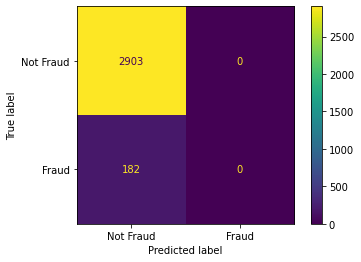

In [ ]:
eval_pref(rf_pred, y_valid, rf, 'RF')

RF-SMOTH :
Accuarcy:  0.7254457050243112
Roc_Auc:  0.6764402493820337
G-mean:  0.6741545609009189
F1-score:  0.21062441752096928
F2-score:  0.3489808523780112
AUC-PR:  0.3850346014311438


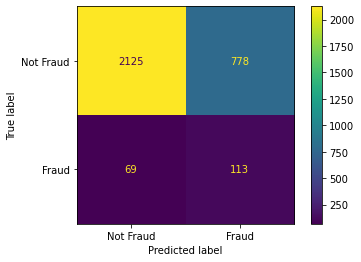

In [ ]:
eval_pref(rf_smoth_pred, y_valid, rf_smoth, 'RF-SMOTH')

RF-SMOTH1 :
Accuarcy:  0.7225283630470016
Roc_Auc:  0.7083653514931503
G-mean:  0.7081833256844573
F1-score:  0.22743682310469313
F2-score:  0.38089480048367597
AUC-PR:  0.423264578429786


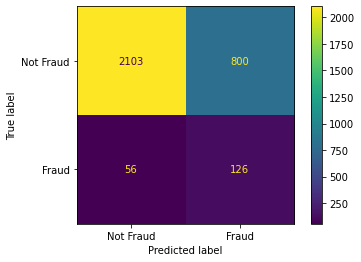

In [ ]:
eval_pref(rf_smoth1_pred, y_valid1, rf_smoth1, 'RF-SMOTH1')

RF-NearMiss :
Accuarcy:  0.4962722852512156
Roc_Auc:  0.657670352382719
G-mean:  0.6317003423876768
F1-score:  0.16451612903225807
F2-score:  0.31795511221945133
AUC-PR:  0.4706198204852735


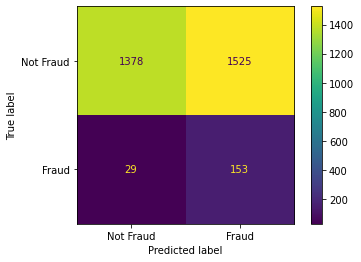

In [ ]:
eval_pref(rf_nearmiss_pred, y_valid, rf_nearmiss, 'RF-NearMiss')

RF-NearMiss1 :
Accuarcy:  0.5072933549432739
Roc_Auc:  0.6635263634057985
G-mean:  0.6394459658984643
F1-score:  0.16757940854326395
F2-score:  0.3225126475548061
AUC-PR:  0.4715626791195531


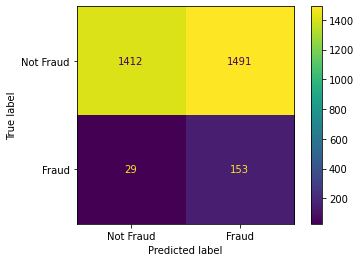

In [ ]:
eval_pref(rf_nearmiss1_pred, y_valid1, rf_nearmiss1, 'RF-NearMiss1')

RF-CS :
Accuarcy:  0.5883306320907618
Roc_Auc:  0.7529355763079497
G-mean:  0.7294402939831154
F1-score:  0.2121588089330025
F2-score:  0.39620018535681184
AUC-PR:  0.5313532496676743


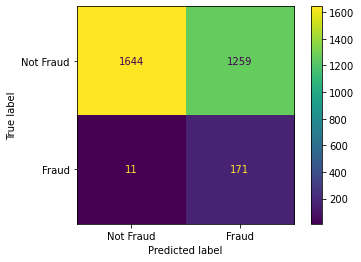

In [ ]:
eval_pref(rf_cs_pred, y_valid, rf_cs, 'RF-CS')

RF-CS :
Accuarcy:  0.5889789303079417
Roc_Auc:  0.7532800475446013
G-mean:  0.7298838575960032
F1-score:  0.2124223602484472
F2-score:  0.39656771799628937
AUC-PR:  0.5314369894572964


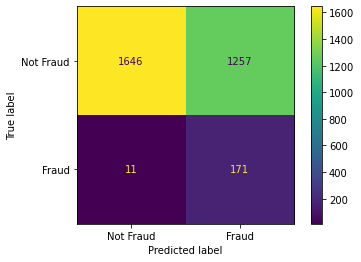

In [ ]:
eval_pref(rf_cs1_pred, y_valid1, rf_cs1, 'RF-CS')

 ## SVM Smoth measures

SVM-SMOTH1 :
Accuarcy:  0.7137763371150729
Roc_Auc:  0.7191650925719131
G-mean:  0.7191391400571971
F1-score:  0.2301656495204882
F2-score:  0.38984051978735973
AUC-PR:  0.43913487273553103


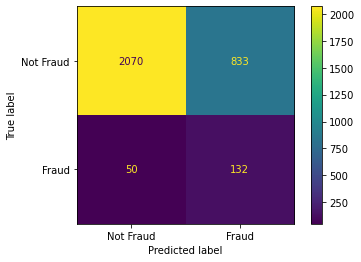

In [ ]:
eval_pref(svm_smoth1_pred, y_valid1, svm_smoth1, 'SVM-SMOTH1')

SVM-COMP-SMOTH :
Accuarcy:  0.6813614262560778
Roc_Auc:  0.6401411196450811
G-mean:  0.6384328759687443
F1-score:  0.18015012510425354
F2-score:  0.30945558739255014
AUC-PR:  0.36179415885386823


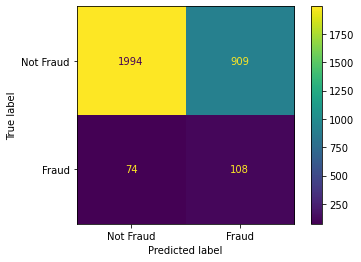

In [ ]:
eval_pref(svm_comp_smoth_pred, y_valid, svm_comp_smoth, 'SVM-COMP-SMOTH')


SVM-COMP-SMOTH1 :
Accuarcy:  0.6632090761750405
Roc_Auc:  0.5583954454088798
G-mean:  0.5456039908563558
F1-score:  0.13344453711426185
F2-score:  0.22922636103151864
AUC-PR:  0.2756431910833024


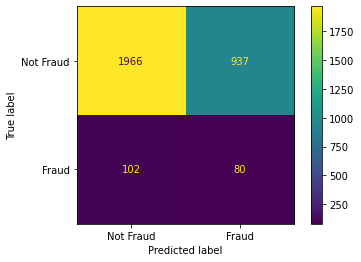

In [ ]:
eval_pref(svm_comp_smoth1_pred, y_valid1, svm_comp_smoth1, 'SVM-COMP-SMOTH1')


## SVM Nearmiss measures

SVM-NearMiss :
Accuarcy:  0.4917341977309562
Roc_Auc:  0.6140587796633267
G-mean:  0.5981920196017856
F1-score:  0.14875135722041258
F2-score:  0.2868509212730318
AUC-PR:  0.4249320415578641


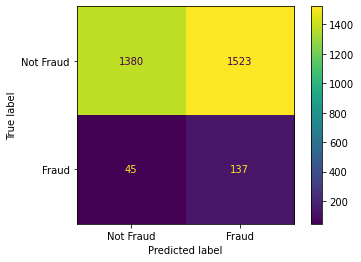

In [ ]:
eval_pref(svm_nearmiss_pred, y_valid, svm_nearmiss, 'SVM-NearMiss')

SVM-NearMiss1 :
Accuarcy:  0.4888168557536467
Roc_Auc:  0.6588589674190777
G-mean:  0.6300217395273202
F1-score:  0.16428192898781135
F2-score:  0.3185367858610769
AUC-PR:  0.4756547342446856


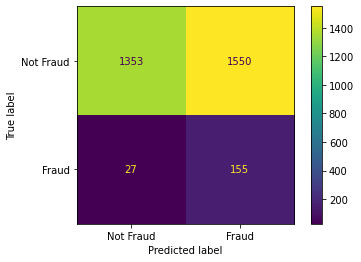

In [ ]:
eval_pref(svm_nearmiss1_pred, y_valid1, svm_nearmiss1, 'SVM-NearMiss1')

SVM-COMP-NearMiss :
Accuarcy:  0.5452188006482982
Roc_Auc:  0.6630777937185102
G-mean:  0.6494739297883094
F1-score:  0.17129356172474897
F2-score:  0.3238052702099151
AUC-PR:  0.4523298760862408


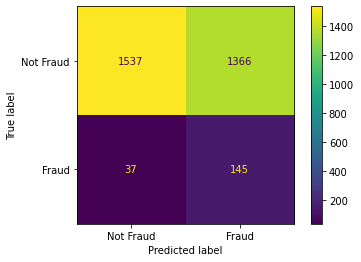

In [ ]:
eval_pref(svm_comp_nearmiss_pred, y_valid1, svm_comp_nearmiss, 'SVM-COMP-NearMiss')

SVM-COMP-NearMiss1 :
Accuarcy:  0.5633711507293355
Roc_Auc:  0.5491221661562687
G-mean:  0.5488844733054407
F1-score:  0.12589227774172615
F2-score:  0.23239099185433637
AUC-PR:  0.3159478594852708


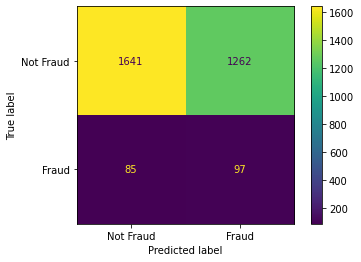

In [ ]:
eval_pref(svm_comp_nearmiss1_pred, y_valid1, svm_comp_nearmiss1, 'SVM-COMP-NearMiss1')

## SVM CS measures

SVM-CS :
Accuarcy:  0.5961102106969206
Roc_Auc:  0.7364690941163555
G-mean:  0.7190707075169145
F1-score:  0.2073791348600509
F2-score:  0.3847969782813976
AUC-PR:  0.5095147078589822


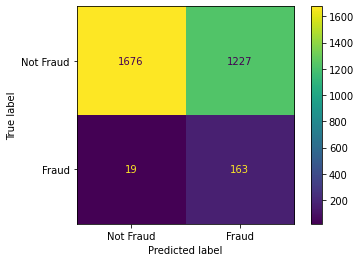

In [ ]:
eval_pref(svm_cs_pred, y_valid, svm_cs, 'SVM-CS')

SVM-CS1 :
Accuarcy:  0.6074554294975689
Roc_Auc:  0.7296222551131266
G-mean:  0.7163544669071051
F1-score:  0.20694171578258022
F2-score:  0.3810902074288471
AUC-PR:  0.49669178284856735


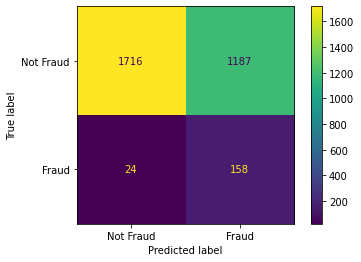

In [ ]:
eval_pref(svm_cs1_pred, y_valid1, svm_cs1, 'SVM-CS1')

SVM-Comp-CS1 :
Accuarcy:  0.3824959481361426
Roc_Auc:  0.6332658901553148
G-mean:  0.5658531610462177
F1-score:  0.14917373827601607
F2-score:  0.29982046678635543
AUC-PR:  0.5018154238484628


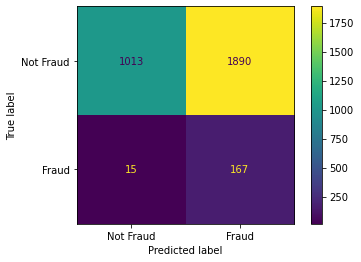

In [ ]:
eval_pref(svm_comp_cs1_pred, y_valid1, svm_comp_cs1, 'SVM-Comp-CS1')

SVM-Comp-CS :
Accuarcy:  0.3708265802269044
Roc_Auc:  0.6476655449269986
G-mean:  0.5665284196784832
F1-score:  0.1527717154081187
F2-score:  0.30842439196334154
AUC-PR:  0.5233926099276265


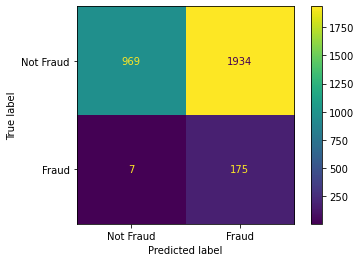

In [ ]:
eval_pref(svm_comp_cs_pred, y_valid, svm_comp_cs, 'SVM-Comp-CS')

### NB Smoth measures

NB-SMOTH :
Accuarcy:  0.6061588330632091
Roc_Auc:  0.7031831413505544
G-mean:  0.6945255376601889
F1-score:  0.1958967571144937
F2-score:  0.3597472046669907
AUC-PR:  0.4677849045696088


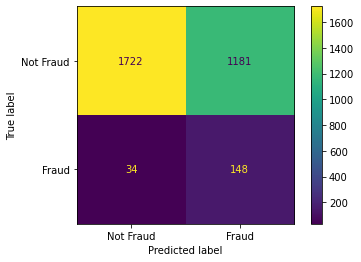

In [ ]:
eval_pref(nb_smoth_pred, y_valid, nb_smoth, 'NB-SMOTH')

NB-SMOTH1 :
Accuarcy:  0.5821717990275527
Roc_Auc:  0.7161878768837087
G-mean:  0.699884346530749
F1-score:  0.19688473520249222
F2-score:  0.36727103672710365
AUC-PR:  0.4934722377751976


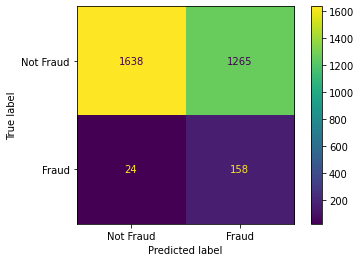

In [ ]:
eval_pref(nb_smoth1_pred, y_valid1, nb_smoth1, 'NB-SMOTH1')

NB-COMP-SMOTH1 :
Accuarcy:  0.48038897893030796
Roc_Auc:  0.6054555158929944
G-mean:  0.5886169611079523
F1-score:  0.14506666666666668
F2-score:  0.2808756712102437
AUC-PR:  0.42124719001112504


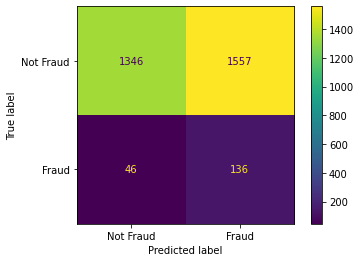

In [ ]:
eval_pref(nb_comp_smoth1_pred, y_valid1, nb_comp_smoth1, 'NB-COMP-SMOTH1')

##  comp nb

NB-COMP-SMOTH :
Accuarcy:  0.6784440842787682
Roc_Auc:  0.6643411703694171
G-mean:  0.6641487226769694
F1-score:  0.19218241042345277
F2-score:  0.3325817361894025
AUC-PR:  0.3909539493791921


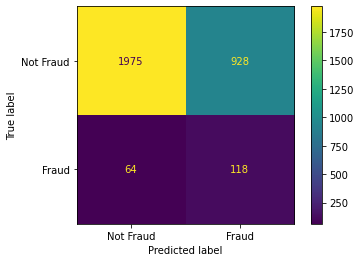

In [ ]:
eval_pref(nb_comp_smoth_pred, y_valid, nb_comp_smoth, 'NB-COMP-SMOTH')

NB-COMP-SMOTH1 :
Accuarcy:  0.40162074554294974
Roc_Auc:  0.6022275175737112
G-mean:  0.5576268915220793
F1-score:  0.14059590316573556
F2-score:  0.28025241276911655
AUC-PR:  0.4582623244415034


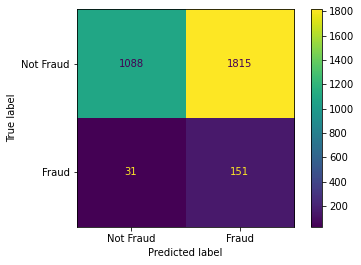

In [ ]:
eval_pref(nb_comp_smoth1_pred, y_valid, nb_comp_smoth1, 'NB-COMP-SMOTH1')

### NB nearmiss measures

NB--nearmiss :
Accuarcy:  0.47228525121555914
Roc_Auc:  0.6062996596927013
G-mean:  0.5869521922882597
F1-score:  0.1449579831932773
F2-score:  0.2816326530612245
AUC-PR:  0.42632184592100786


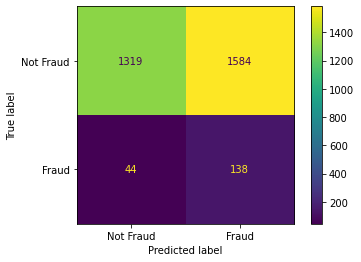

In [ ]:
eval_pref(nb_nearmiss_pred, y_valid, nb_nearmiss, 'NB--nearmiss')

NB--nearmiss1 :
Accuarcy:  0.49854132901134524
Roc_Auc:  0.6048006420035357
G-mean:  0.5926801935511724
F1-score:  0.14577581446714521
F2-score:  0.2800169707254985
AUC-PR:  0.41125674412743374


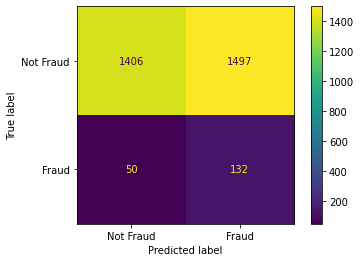

In [ ]:
eval_pref(nb_nearmiss1_pred, y_valid1, nb_nearmiss1, 'NB--nearmiss1')

NB-COMP-nearmiss :
Accuarcy:  0.5092382495948136
Roc_Auc:  0.6104844174082893
G-mean:  0.5995952043823126
F1-score:  0.14848143982002246
F2-score:  0.28399311531841653
AUC-PR:  0.412094473810758


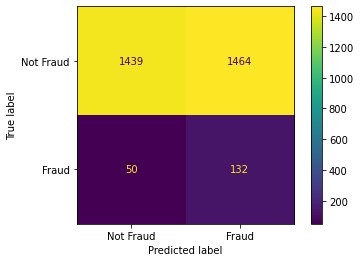

In [ ]:
eval_pref(nb_comp_nearmiss_pred, y_valid, nb_comp_nearmiss, 'NB-COMP-nearmiss')

NB-COMP-nearmiss1 :
Accuarcy:  0.5286871961102106
Roc_Auc:  0.6053684517342802
G-mean:  0.5990930902653426
F1-score:  0.14771395076201643
F2-score:  0.2797513321492007
AUC-PR:  0.3965686038715302


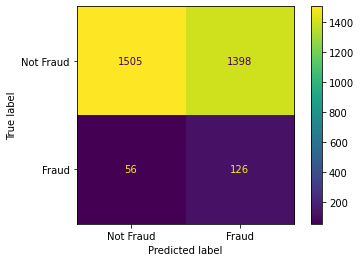

In [ ]:
eval_pref(nb_comp_nearmiss1_pred, y_valid, nb_comp_nearmiss1, 'NB-COMP-nearmiss1')

NB-CS :
Accuarcy:  0.5312803889789303
Roc_Auc:  0.6942969190644009
G-mean:  0.669244585791593
F1-score:  0.18120045300113252
F2-score:  0.34602076124567477
AUC-PR:  0.4936311302599795


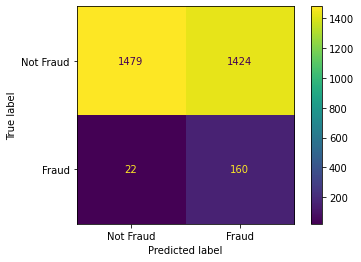

In [ ]:
eval_pref(nb_cs_pred, y_valid, nb_cs, 'NB-CS')

NB-CS :
Accuarcy:  0.5312803889789303
Roc_Auc:  0.6942969190644009
G-mean:  0.669244585791593
F1-score:  0.18120045300113252
F2-score:  0.34602076124567477
AUC-PR:  0.4936311302599795


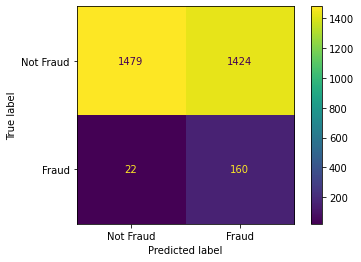

In [ ]:
eval_pref(nb_cs_pred, y_valid, nb_cs, 'NB-CS')

NB-CS1 :
Accuarcy:  0.587034035656402
Roc_Auc:  0.7239214454164505
G-mean:  0.7070893825476859
F1-score:  0.20075282308657466
F2-score:  0.37383177570093457
AUC-PR:  0.499783303550963


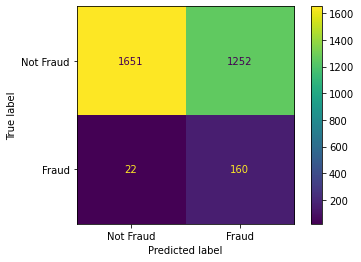

In [ ]:
eval_pref(nb_cs_pred1, y_valid, nb_cs1, 'NB-CS1')

NB-Comp CS :
Accuarcy:  0.5896272285251215
Roc_Auc:  0.7201492961052038
G-mean:  0.7047809355091791
F1-score:  0.19974715549936786
F2-score:  0.37124060150375937
AUC-PR:  0.4943842947975849


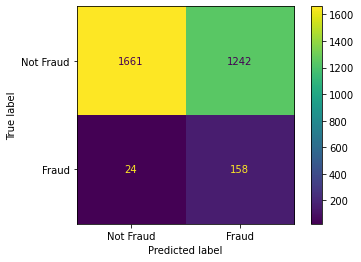

In [ ]:
eval_pref(nb_cs_comp_pred,y_valid , nb_comp_cs, 'NB-Comp CS')

NB-Comp CS :
Accuarcy:  0.5546191247974068
Roc_Auc:  0.7144229349706444
G-mean:  0.6910668624197588
F1-score:  0.19176470588235292
F2-score:  0.3628673196794301
AUC-PR:  0.5045706788924321


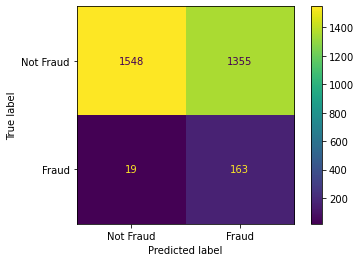

In [ ]:
eval_pref(nb_cs_comp_pred1,y_valid1 , nb_comp_cs1, 'NB-Comp CS')

chosen model :
Accuarcy:  0.6251621271076524
Roc_Auc:  0.7956771002946055
G-mean:  0.7718316237412358
F1-score:  0.23746701846965695
F2-score:  0.4364694471387003
AUC-PR:  0.5622960155873661


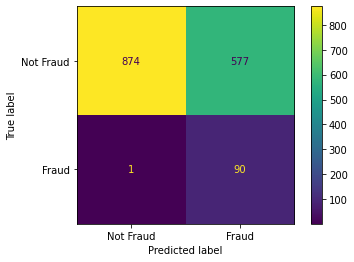

In [ ]:

rf_cs1.fit(X_train1, y_train1)
rf_cs1_pred_test = rf_cs1.predict(X_test1)
eval_pref(rf_cs1_pred_test,y_test1 , rf_cs1, 'chosen model') 